# Portrait Plot: ENSO

Generate a static image of Portrait plot for PMP ENSO metrics obtained from CMIP5 and CMIP6 models, compare multi-model averaged statistics from each group, and compare to the user's model.

Jiwoo Lee (LLNL/PCMDI), 2025. 02

References

* Planton, Y., E. Guilyardi, A. T. Wittenberg, J. Lee, P. J. Gleckler, T. Bayr, S. McGregor, M. J. McPhaden, S. Power, R. Roehrig,  J. Vialard, A. Voldoire, 2021: A New Way of Evaluating ENSO in Climate Models: The CLIVAR ENSO Metrics Package. Bulletin of the American Meteorological Society, 102, 1073-1080, [doi: 10.1175/BAMS-D-19-0337.A](https://doi.org/10.1175/BAMS-D-19-0337.A)

* Lee, J., P. J. Gleckler, M.-S. Ahn, A. Ordonez, P. Ullrich, K. R. Sperber, K. E. Taylor, Y. Y. Planton, E. Guilyardi, P. Durack, C. Bonfils, M. D. Zelinka, L.-W. Chao, B. Dong, C. Doutriaux, C. Zhang, T. Vo, J. Boutte, M. F. Wehner, A. G. Pendergrass, D. Kim, Z. Xue, A. T. Wittenberg, and J. Krasting, 2024: Systematic and Objective Evaluation of Earth System Models: PCMDI Metrics Package (PMP) version 3. Geoscientific Model Development, 17, 3919–3948, [doi: 10.5194/gmd-17-3919-2024](https://doi.org/10.5194/gmd-17-3919-2024)

## Import functions

In [1]:
import os
from glob import glob
from pcmdi_metrics.enso.lib import enso_portrait_plot
from pcmdi_metrics.utils import download_files_from_github
from pprint import pprint

## Pre-calculated PMP output

Download PMP ENSO metric output for CMIP5 and CMIP6 from the [PMP output DB](https://github.com/PCMDI/pcmdi_metrics_results_archive)

In [2]:
db_url_head = "https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/metrics_results/enso_metric"

dirs_to_downlaod = [
    "cmip5/historical/v20210104/ENSO_perf",
    "cmip5/historical/v20210104/ENSO_tel",
    "cmip5/historical/v20210104/ENSO_proc",
    "cmip6/historical/v20210620/ENSO_perf",
    "cmip6/historical/v20210620/ENSO_tel",
    "cmip6/historical/v20210620/ENSO_proc",
    "obs2obs"
]

path_json = "json_files"

for directiry in dirs_to_downlaod:
    github_directory_url = os.path.join(db_url_head, directiry)
    print(github_directory_url)
    download_files_from_github(github_directory_url, path_json)

https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/metrics_results/enso_metric/cmip5/historical/v20210104/ENSO_perf
Saved cmip5_historical_ENSO_perf_v20210104_allModels_allRuns.json to json_files/cmip5_historical_ENSO_perf_v20210104_allModels_allRuns.json
https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/metrics_results/enso_metric/cmip5/historical/v20210104/ENSO_tel
Saved cmip5_historical_ENSO_tel_v20210104_allModels_allRuns.json to json_files/cmip5_historical_ENSO_tel_v20210104_allModels_allRuns.json
https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/metrics_results/enso_metric/cmip5/historical/v20210104/ENSO_proc
Saved cmip5_historical_ENSO_proc_v20210104_allModels_allRuns.json to json_files/cmip5_historical_ENSO_proc_v20210104_allModels_allRuns.json
https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/metrics_results/enso_metric/cmip6/historical/v20210620/ENSO_perf
Saved cmip6_historical_ENSO_perf_v20210620_allModels_allRuns.js

Make a dictionary that includes path for the JSON files:

In [3]:
metrics_collections = ["ENSO_perf", "ENSO_tel", "ENSO_proc"]
mips = ["CMIP5", "CMIP6", "obs2obs"]

dict_json_path = dict()
for mip in mips:
    dict_json_path[mip] = dict()
    for metrics_collection in metrics_collections:
        dict_json_path[mip][metrics_collection] = glob(os.path.join(path_json, f"{mip.lower()}*{metrics_collection}_*.json"))[0]
        
pprint(dict_json_path)

{'CMIP5': {'ENSO_perf': 'json_files/cmip5_historical_ENSO_perf_v20210104_allModels_allRuns.json',
           'ENSO_proc': 'json_files/cmip5_historical_ENSO_proc_v20210104_allModels_allRuns.json',
           'ENSO_tel': 'json_files/cmip5_historical_ENSO_tel_v20210104_allModels_allRuns.json'},
 'CMIP6': {'ENSO_perf': 'json_files/cmip6_historical_ENSO_perf_v20210620_allModels_allRuns.json',
           'ENSO_proc': 'json_files/cmip6_historical_ENSO_proc_v20210620_allModels_allRuns.json',
           'ENSO_tel': 'json_files/cmip6_historical_ENSO_tel_v20210620_allModels_allRuns.json'},
 'obs2obs': {'ENSO_perf': 'json_files/obs2obs_ENSO_perf_v20200420.json',
             'ENSO_proc': 'json_files/obs2obs_ENSO_proc_v20200420.json',
             'ENSO_tel': 'json_files/obs2obs_ENSO_tel_v20200420.json'}}


## Generate the Portrait Plot

In [4]:
list_project = ["CMIP5", "CMIP6"]
#list_project = ["CMIP6"]
#list_project = ["CMIP5"]

list_obs = ["20CRv2", "NCEP2", "ERA-Interim"]
#list_obs = ["20CRv2"]  # To show one alternative reference dataset
#list_obs = []  # To not show any alternative reference dataset

figure_name = "enso_portrait_plot.png"  # output file path. To make it as a vector image, FILEPATH.pdf would also work. 

Note: The following keys were considered to be the same for CMIP6:
Predefined reference: Tropflux_Tropflux, reference key in the JSON: Tropflux_ERA-Interim


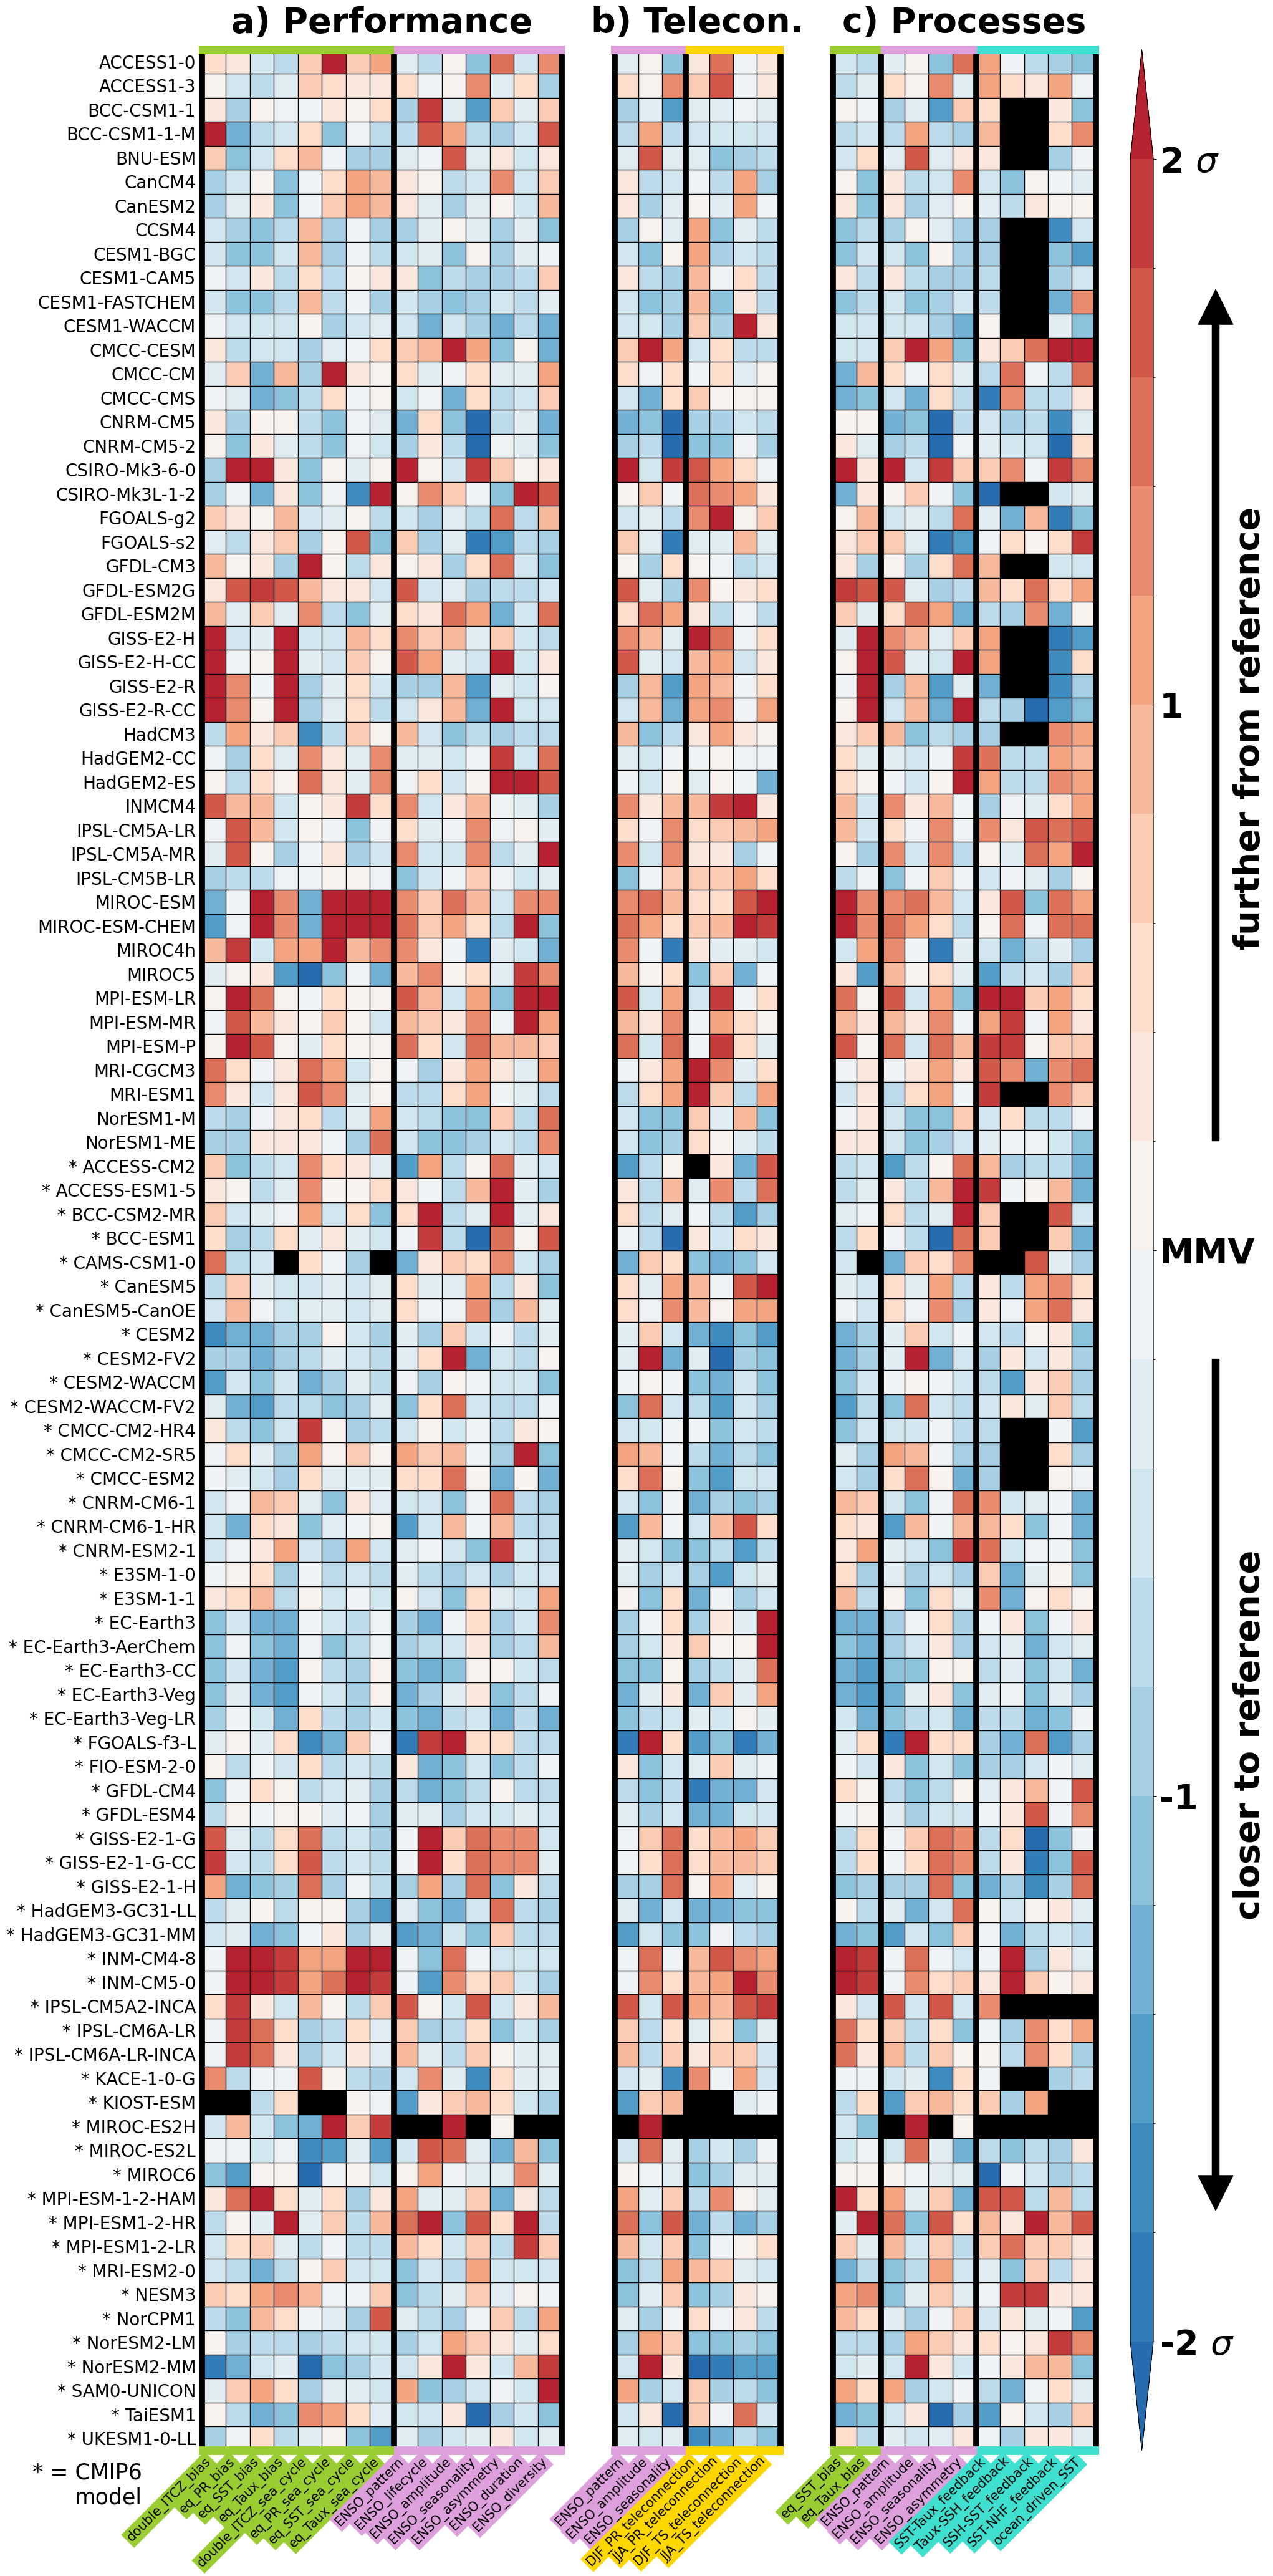

In [5]:
#ref_info_dict = enso_portrait_plot(metrics_collections, list_project, list_obs, dict_json_path, figure_name=figure_name, reduced_set=True)
fig, ref_info_dict = enso_portrait_plot(metrics_collections, list_project, list_obs, dict_json_path, figure_name=figure_name, reduced_set=True)

### Optional information: CMIP means and alternative observation datasets

Attach additional rows at the bottom of the plot for CMIP means and alternative observation datasets. Also, sorting models in alpabetical order regardless of the CMIP generation.

/Users/lee1043/mambaforge/envs/pmp_devel_20241202/lib/python3.10/site-packages/numpy/ma/core.py:2846: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


Note: The following keys were considered to be the same for CMIP6:
Predefined reference: Tropflux_Tropflux, reference key in the JSON: Tropflux_ERA-Interim


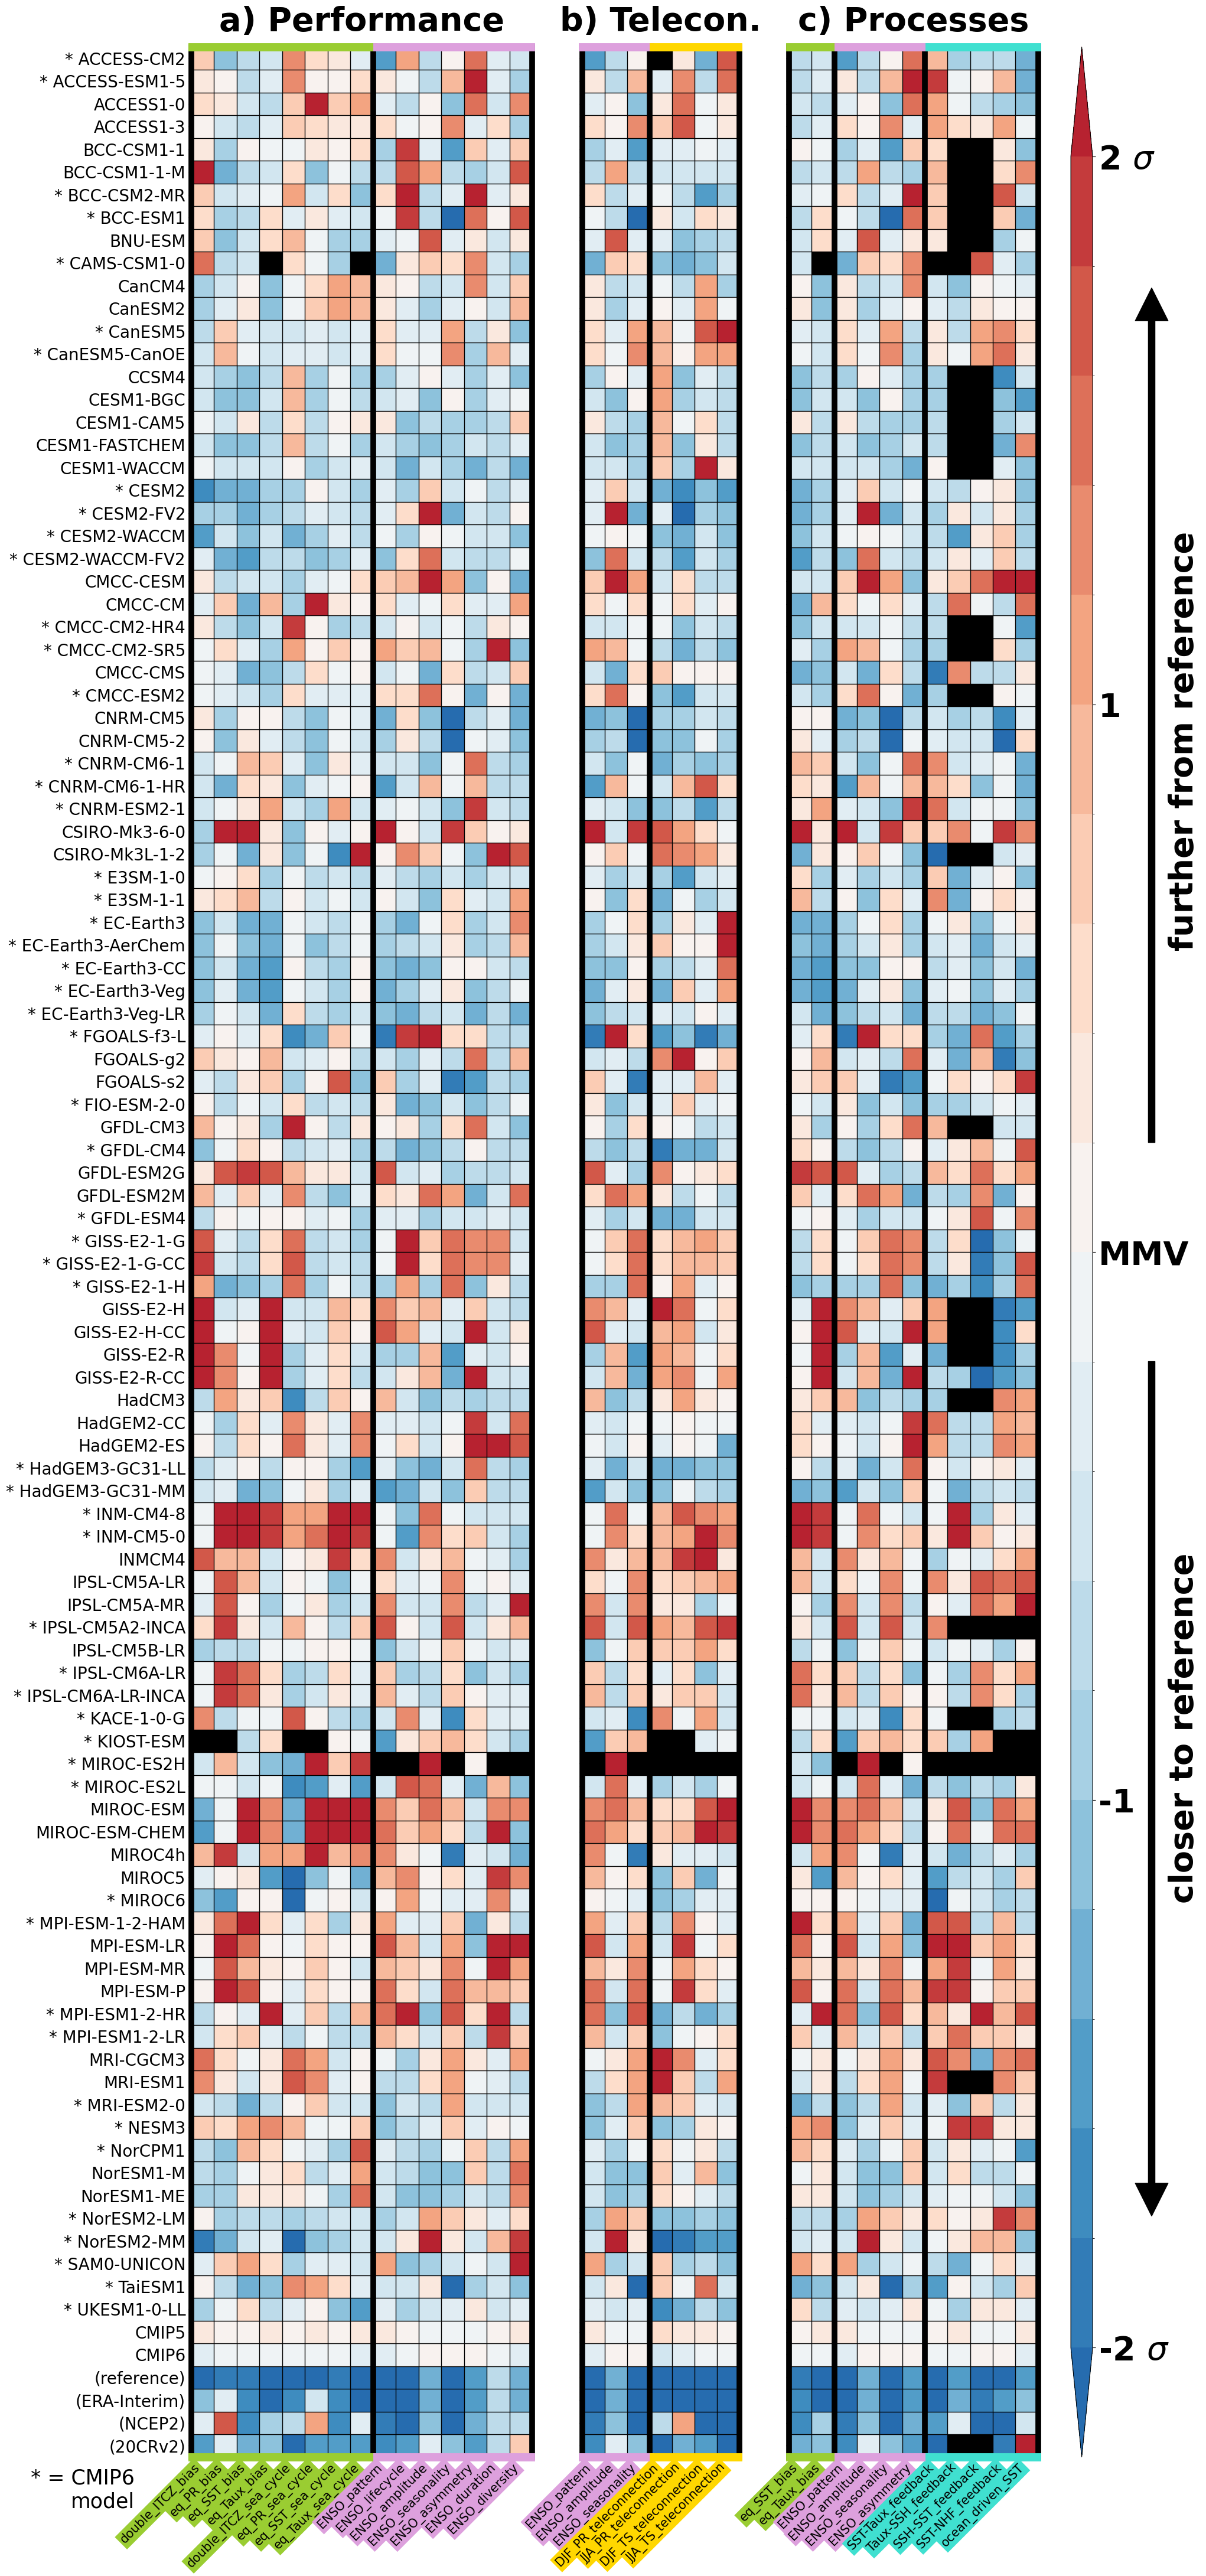

In [6]:
fig, ref_info_dict = enso_portrait_plot(
    metrics_collections, list_project, list_obs, dict_json_path, figure_name=figure_name, reduced_set=True, 
    sort_y_names=True, show_proj_means=True, show_ref_row=True, show_alt_obs_rows=True)

## Add my model

Add my own model's PMP ENSO output to compare with CMIP models. 

Download an example set of JSON files as a user model:

In [7]:
db_url = "https://github.com/PCMDI/pcmdi_metrics_results_archive/tree/main/test_case/enso"
path_json_my_model = "json_files/my_model"
download_files_from_github(db_url, path_json_my_model)

Saved my_model_ENSO_perf.json to json_files/my_model/my_model_ENSO_perf.json
Saved my_model_ENSO_tel.json to json_files/my_model/my_model_ENSO_tel.json
Saved my_model_ENSO_proc.json to json_files/my_model/my_model_ENSO_proc.json


Update the dictionary of JSON path to include my model:

In [8]:
dict_json_path["my_model"] = dict()

for metrics_collection in metrics_collections:
    dict_json_path["my_model"][metrics_collection] = glob(os.path.join(path_json_my_model, f"*_{metrics_collection}.json"))[0]
    
pprint(dict_json_path)

{'CMIP5': {'ENSO_perf': 'json_files/cmip5_historical_ENSO_perf_v20210104_allModels_allRuns.json',
           'ENSO_proc': 'json_files/cmip5_historical_ENSO_proc_v20210104_allModels_allRuns.json',
           'ENSO_tel': 'json_files/cmip5_historical_ENSO_tel_v20210104_allModels_allRuns.json'},
 'CMIP6': {'ENSO_perf': 'json_files/cmip6_historical_ENSO_perf_v20210620_allModels_allRuns.json',
           'ENSO_proc': 'json_files/cmip6_historical_ENSO_proc_v20210620_allModels_allRuns.json',
           'ENSO_tel': 'json_files/cmip6_historical_ENSO_tel_v20210620_allModels_allRuns.json'},
 'my_model': {'ENSO_perf': 'json_files/my_model/my_model_ENSO_perf.json',
              'ENSO_proc': 'json_files/my_model/my_model_ENSO_proc.json',
              'ENSO_tel': 'json_files/my_model/my_model_ENSO_tel.json'},
 'obs2obs': {'ENSO_perf': 'json_files/obs2obs_ENSO_perf_v20200420.json',
             'ENSO_proc': 'json_files/obs2obs_ENSO_proc_v20200420.json',
             'ENSO_tel': 'json_files/obs2obs_EN

Generate the plot:

Note: The following keys were considered to be the same for my_model:
Predefined reference: GPCPv2.3, reference key in the JSON: GPCP-2-3
Predefined reference: Tropflux, reference key in the JSON: TropFlux-1-0
Note: The following keys were considered to be the same for my_model:
Predefined reference: GPCPv2.3, reference key in the JSON: GPCP-2-3
Predefined reference: Tropflux, reference key in the JSON: TropFlux-1-0
Predefined reference: Tropflux_GPCPv2.3, reference key in the JSON: TropFlux-1-0_GPCP-2-3
Predefined reference: ERA-Interim, reference key in the JSON: ERA-INT
Note: The following keys were considered to be the same for my_model:
Predefined reference: GPCPv2.3, reference key in the JSON: GPCP-2-3
Predefined reference: Tropflux, reference key in the JSON: TropFlux-1-0
Predefined reference: Tropflux_GPCPv2.3, reference key in the JSON: TropFlux-1-0_GPCP-2-3
Predefined reference: ERA-Interim, reference key in the JSON: ERA-INT
Predefined reference: Tropflux_Tropflux, reference

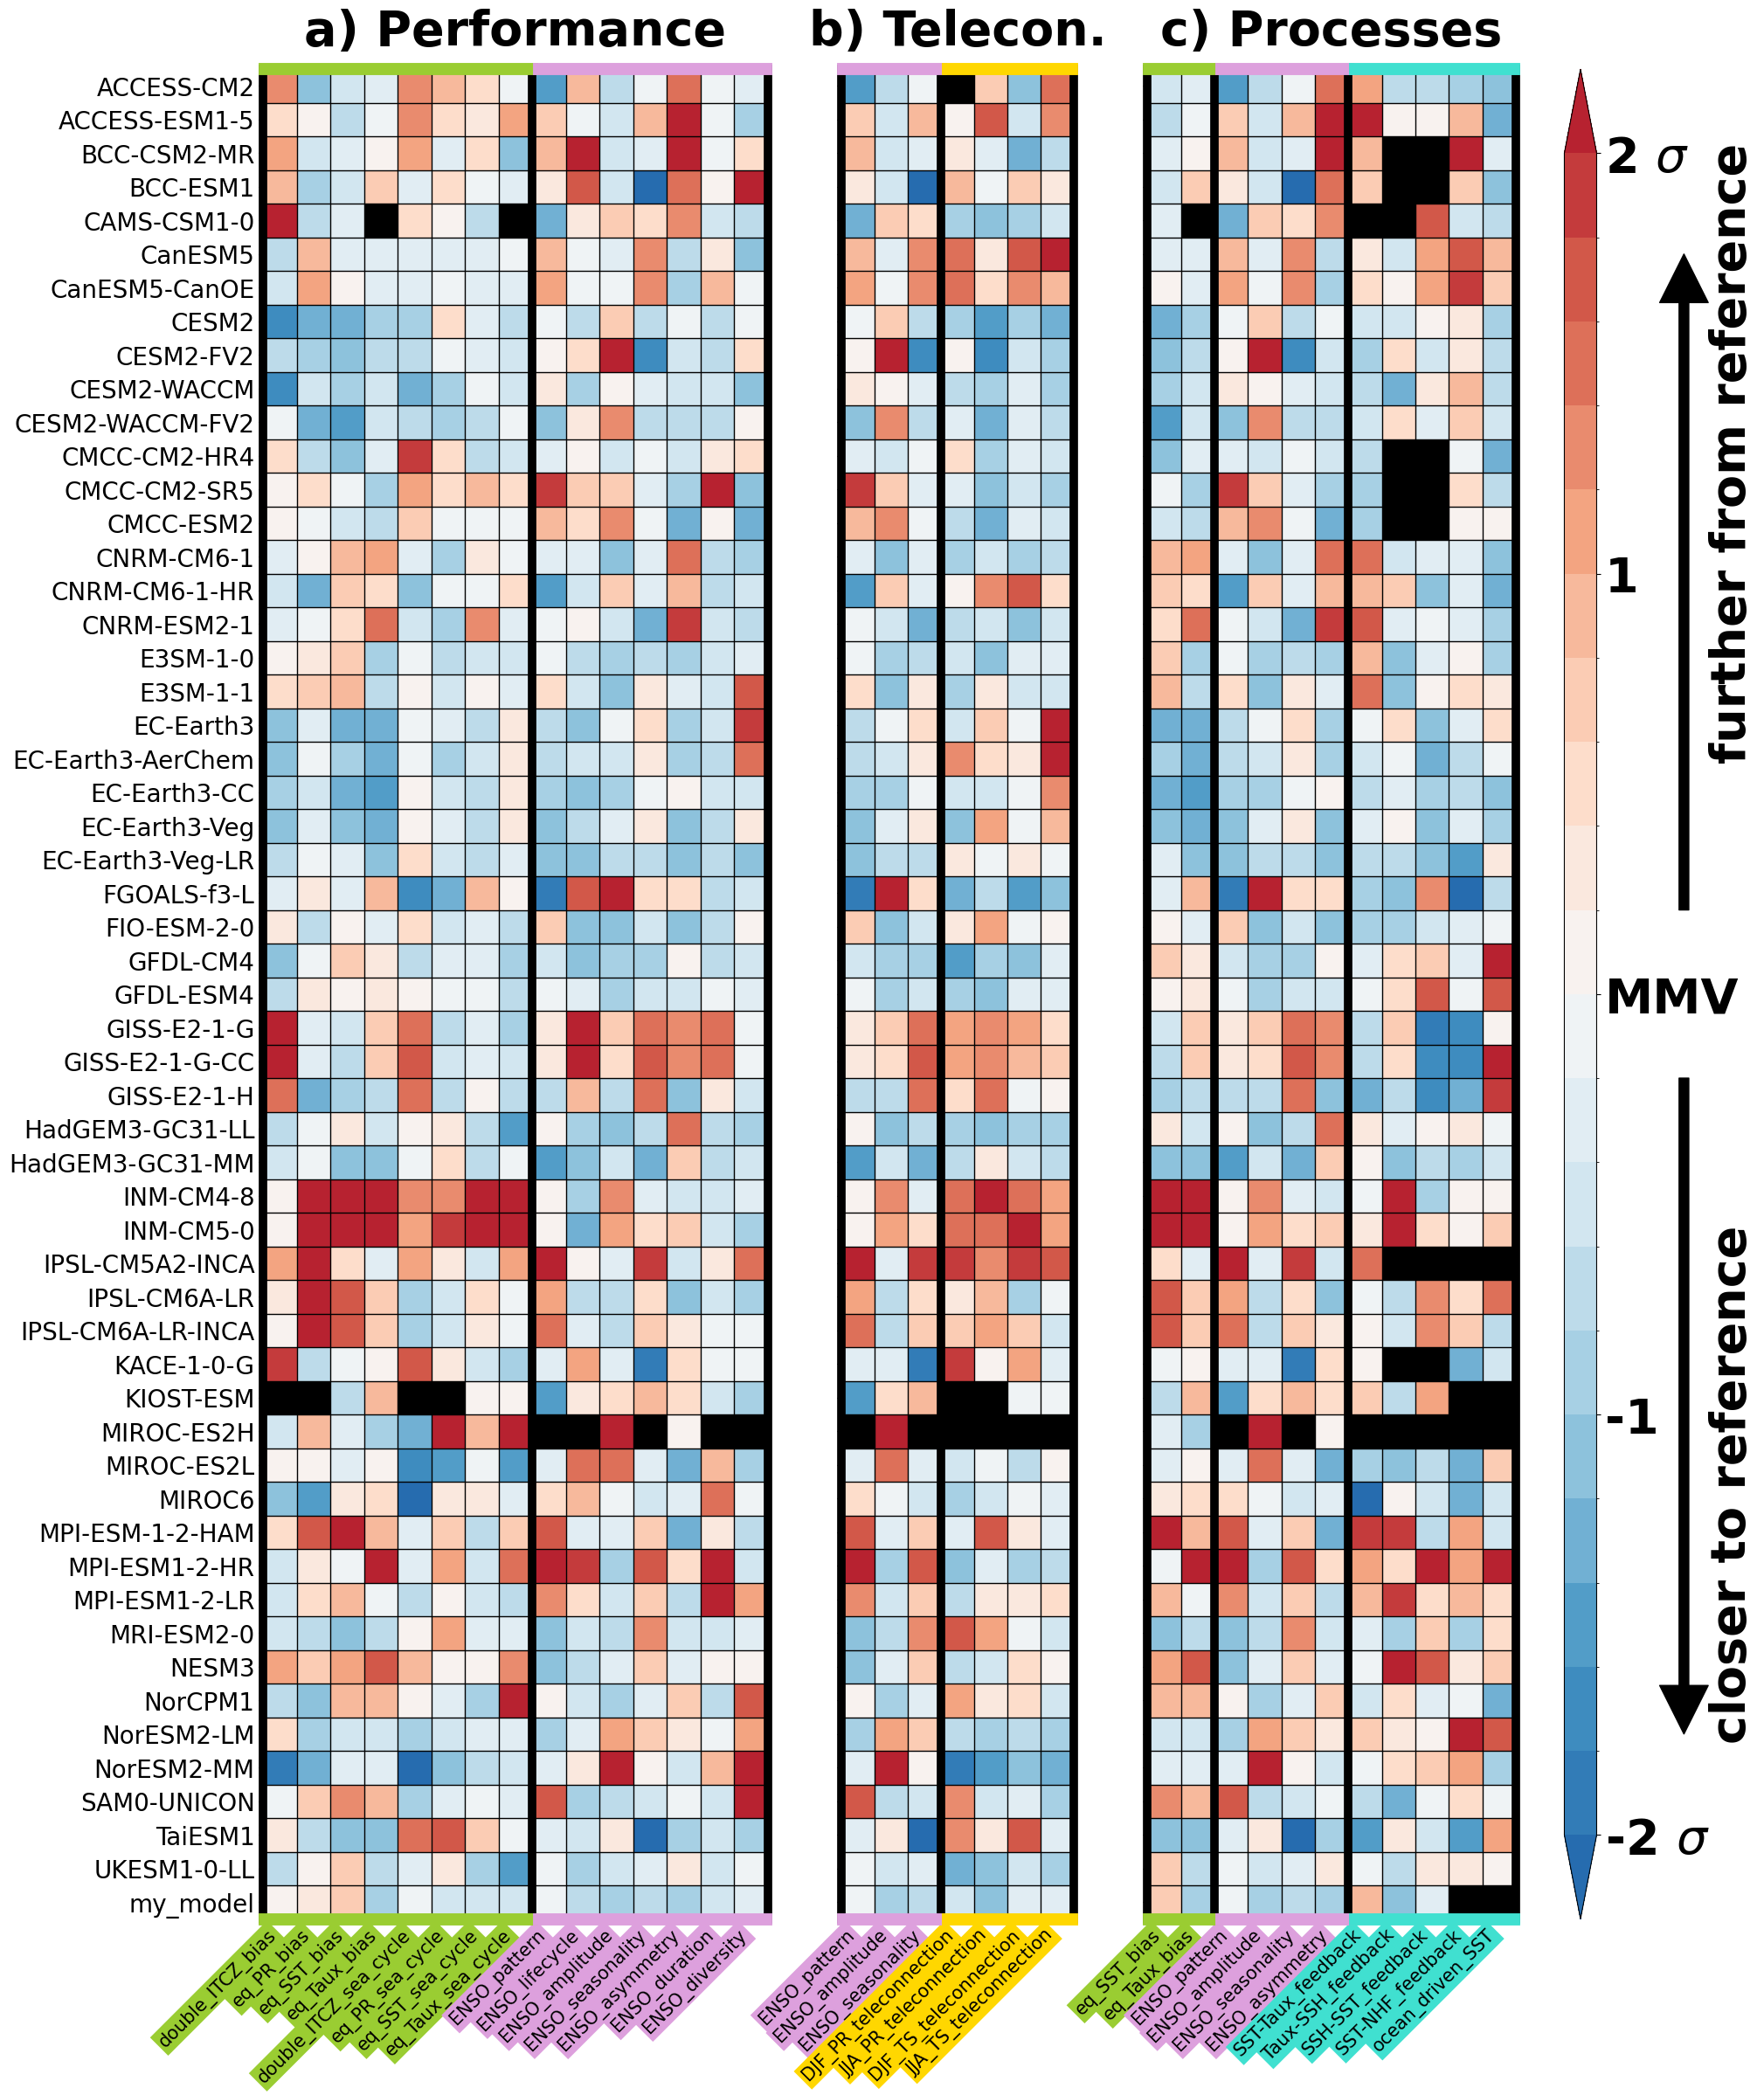

In [9]:
list_project = ["CMIP6", "my_model"]

fig, ref_info_dict = enso_portrait_plot(metrics_collections, list_project, list_obs, dict_json_path, figure_name=figure_name, reduced_set=True)

## Reference dataset information

In [10]:
pprint(ref_info_dict)

{'ENSO_perf': {'CMIP6': {'BiasPrLatRmse': 'GPCPv2.3',
                         'BiasPrLonRmse': 'GPCPv2.3',
                         'BiasSstLonRmse': 'Tropflux',
                         'BiasTauxLonRmse': 'Tropflux',
                         'EnsoAmpl': 'Tropflux',
                         'EnsoDuration': 'Tropflux',
                         'EnsoSeasonality': 'Tropflux',
                         'EnsoSstDiversity_2': 'Tropflux',
                         'EnsoSstLonRmse': 'Tropflux',
                         'EnsoSstSkew': 'Tropflux',
                         'EnsoSstTsRmse': 'Tropflux',
                         'SeasonalPrLatRmse': 'GPCPv2.3',
                         'SeasonalPrLonRmse': 'GPCPv2.3',
                         'SeasonalSstLonRmse': 'Tropflux',
                         'SeasonalTauxLonRmse': 'Tropflux'},
               'my_model': {'BiasPrLatRmse': 'GPCP-2-3',
                            'BiasPrLonRmse': 'GPCP-2-3',
                            'BiasSstLonRmse': 'TropFl